<a href="https://colab.research.google.com/github/14XZ/Blotto-game/blob/master/Blotto_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# DIU_strategy
import random

def r_func(m,x):
	ret = np.floor(m*x+0.5)*1.0/m
	return ret 

def DIU(n_A_soldiers, n_B_soldiers, num_castles):
	values = [i +1 for i in range(num_castles)]
	flag_switch = n_A_soldiers > n_B_soldiers
	if flag_switch:
		temp = n_B_soldiers
		n_B_soldiers = n_A_soldiers
		n_A_soldiers = temp
		del temp
	# input n_A_soldiers, n_B_soldiers, num_castles, values
	# output: hat X A, hat X B
	ret_xA = np.zeros(num_castles, dtype = int) + np.nan
	ret_xB = np.zeros(num_castles, dtype = int) + np.nan

	Vn = sum(values)
	Lambda = n_B_soldiers *1.0/  n_A_soldiers
	a = np.zeros((1,num_castles))
	while 0 == np.sum(a):
		# print(np.sum(a))
		a = np.random.binomial(n = 1, p = 1.0/Lambda, size = num_castles) \
		* np.array([2*values[i]*Lambda/ Vn - np.random.uniform(low = 0,high = 2*values[i]*Lambda/ Vn) for i in range(num_castles)])

	b = np.array([2*values[i]*Lambda/ Vn - np.random.uniform(low = 0,high = 2*values[i]*Lambda/ Vn) for i in range(num_castles)])

	SA = np.zeros(num_castles + 1) + np.nan
	SA[0] = 0
	SB = np.zeros(num_castles + 1) + np.nan
	SB[0] = 0
	sum_a = np.sum(a)
	sum_b = np.sum(b)
	# print("a",a)
	# print("b",b)
	for i in range(num_castles):
		SA[i+1] = np.sum(a[:i])/sum_a
		SB[i+1] = np.sum(b[:i])/sum_b *Lambda
		ret_xA[i] = np.floor(n_A_soldiers*SA[i+1]+0.5) - np.floor(n_A_soldiers*SA[i]+0.5)
		ret_xB[i] = np.floor(n_A_soldiers*SB[i+1]+0.5) - np.floor(n_A_soldiers*SB[i]+0.5)
	# print("ret_xA", ret_xA)
	ret_xA = ret_xA.astype(int)
	# print("ret_xA.astype(int)", ret_xA)
	ret_xB = ret_xB.astype(int)
	if flag_switch:
		temp = ret_xB
		ret_xB = ret_xA
		ret_xA = temp
		del temp
	return ret_xA, ret_xB

In [ ]:
results = list()

i=1 
j=1

while j <= 100:
  for i in range(50,100):
    results.append(DIU(i, 100, 10))
    i=i+1
  j=j+1

n_a = list()
sim_index = list()

i=1 
j=1

while j <= 1000:
  for i in range(50,100):
    n_a.append(i)
    sim_index.append(j)
    i=i+1
  j=j+1

equilibria = pd.DataFrame(results, columns=["X_A","X_B"])

parameters = pd.DataFrame(
    {'n_a': n_a,
     'simulation_index': sim_index
    })

simulated_data = pd.concat([equilibria,parameters],axis=1)


A_0 = list()
B_0 = list()

for i in range(len(simulated_data)):
  A_0.append(np.count_nonzero(simulated_data['X_A'][i]==0))
  B_0.append(np.count_nonzero(simulated_data['X_B'][i]==0))

zero_front = pd.DataFrame(
    {'A_0': A_0,
     'B_0': B_0
    })


df = pd.concat([simulated_data,zero_front],axis=1)

In [ ]:

p_A = [i/np.sum(i) +0.0001 for i in df['X_A']] 
logp_A = [np.log2(i) for i in p_A]


p_B = [i/np.sum(i) +0.0001 for i in df['X_B']]  
logp_B = [np.log2(i) for i in p_B]

Shannon_A = [-np.sum(p_A[i]*logp_A[i]) for i in range(len(df))]
Shannon_B = [-np.sum(p_B[i]*logp_B[i]) for i in range(len(df))]


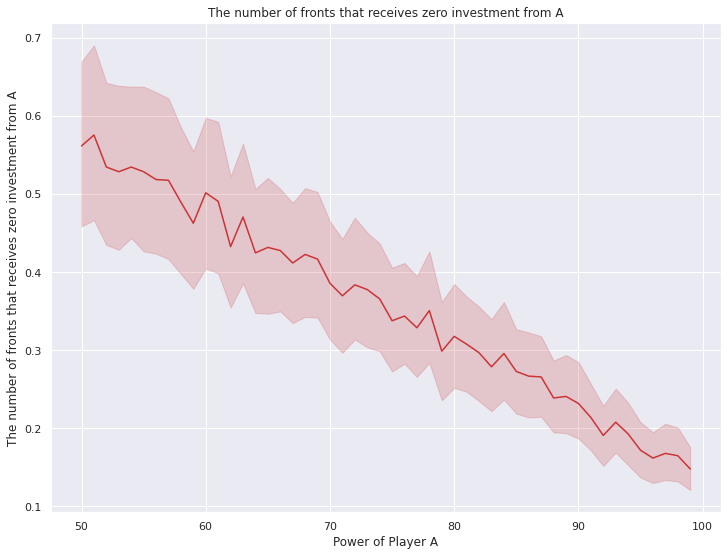

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

sns.set(rc={'figure.figsize':(12,9)})
sns.set_palette("Set1", 8, .75)
A_nonzero = sns.lineplot(
    x='n_a',
    y='A_0',
    data= df)
A_nonzero.set(xlabel="Power of Player A", ylabel = "The number of fronts that receives zero investment from A")
A_nonzero.set_title("The number of fronts that receives zero investment from A")
plt.show()

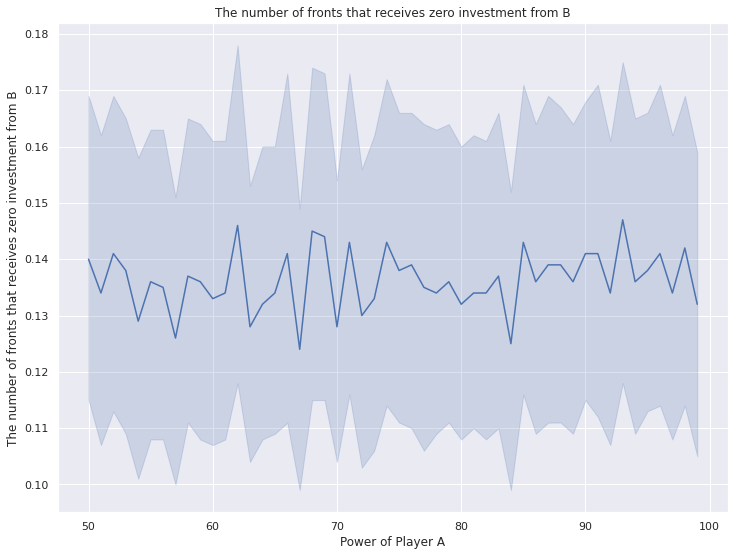

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
B_nonzero = sns.lineplot(
    x='n_a',
    y='B_0',
    data= df)
B_nonzero.set(xlabel="Power of Player A", ylabel = "The number of fronts that receives zero investment from B")
B_nonzero.set_title("The number of fronts that receives zero investment from B")
plt.show()

# Heterogeneous value

In [ ]:
import numpy as np
import pandas as pd
# DIU_strategy
import random

def r_func(m,x):
	ret = np.floor(m*x+0.5)*1.0/m
	return ret 

def DIU(n_A_soldiers, n_B_soldiers, num_castles, heterogeneity): # the function takes four inputs, resource of player a, resource of player b, the number of fronts, and the level of heterogeneity in player valuation of fronts
	values = [i +1 for i in range(num_castles)];add_value = list(np.array(values) + np.random.randint(-1, high=heterogeneity, size=num_castles)) # heterogeneity in player valuation

	flag_switch = n_A_soldiers > n_B_soldiers
	if flag_switch:
		temp = n_B_soldiers
		n_B_soldiers = n_A_soldiers
		n_A_soldiers = temp
		del temp
	# input n_A_soldiers, n_B_soldiers, num_castles, values
	# output: hat X A, hat X B
	ret_xA = np.zeros(num_castles, dtype = int) + np.nan
	ret_xB = np.zeros(num_castles, dtype = int) + np.nan

	Vn = sum(values);add_Vn = sum(add_value)

	Lambda = n_B_soldiers *1.0/  n_A_soldiers
	a = np.zeros((1,num_castles))
	while 0 == np.sum(a):
		# print(np.sum(a))
		a = np.random.binomial(n = 1, p = 1.0/Lambda, size = num_castles) \
		* np.array([2*values[i]*Lambda/ Vn - np.random.uniform(low = 0,high = 2*values[i]*Lambda/ Vn) for i in range(num_castles)])

	b = np.array([2*add_value[i]*Lambda/ add_Vn - np.random.uniform(low = 0,high = 2*add_value[i]*Lambda/ add_Vn) for i in range(num_castles)])

	SA = np.zeros(num_castles + 1) + np.nan
	SA[0] = 0
	SB = np.zeros(num_castles + 1) + np.nan
	SB[0] = 0
	sum_a = np.sum(a)
	sum_b = np.sum(b)
	# print("a",a)
	# print("b",b)
	for i in range(num_castles):
		SA[i+1] = np.sum(a[:i])/sum_a
		SB[i+1] = np.sum(b[:i])/sum_b *Lambda
		ret_xA[i] = np.floor(n_A_soldiers*SA[i+1]+0.5) - np.floor(n_A_soldiers*SA[i]+0.5)
		ret_xB[i] = np.floor(n_A_soldiers*SB[i+1]+0.5) - np.floor(n_A_soldiers*SB[i]+0.5)
	# print("ret_xA", ret_xA)
	ret_xA = ret_xA.astype(int)
	# print("ret_xA.astype(int)", ret_xA)
	ret_xB = ret_xB.astype(int)
	if flag_switch:
		temp = ret_xB
		ret_xB = ret_xA
		ret_xA = temp
		del temp
	return ret_xA, ret_xB, values, add_value

In [ ]:
results[0:3]

[(array([ 0,  1,  1,  2,  4,  5,  0,  9,  0, 20]),
  array([ 0,  0,  1,  1,  6, 17, 20,  3, 15, 10]),
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  [1, 1, 6, 9, 10, 10, 16, 11, 16, 13]),
 (array([ 0,  1,  1,  0,  1,  3,  9, 18, 18,  0]),
  array([ 0,  9,  1,  3, 11,  9,  9,  4, 22, 17]),
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  [6, 1, 3, 13, 7, 9, 6, 15, 12, 15]),
 (array([ 0,  2,  0,  2,  4,  1,  0,  7, 15, 13]),
  array([ 0,  9, 14,  2, 10,  8,  3,  0, 22, 14]),
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  [8, 11, 3, 6, 7, 8, 7, 16, 15, 19])]

In [ ]:
results = list()

i=1 
j=1

while j <= 100:
  for i in range(50,100):
    results.append(DIU(i, 100, 10, 100))
    i=i+1
  j=j+1

n_a = list()
sim_index = list()

i=1 
j=1

while j <= 10000:
  for i in range(50,100):
    n_a.append(i)
    sim_index.append(j)
    i=i+1
  j=j+1

equilibria = pd.DataFrame(results, columns=["X_A","X_B","base_value","Player_B_value"])

parameters = pd.DataFrame(
    {'n_a': n_a,
     'simulation_index': sim_index
    })

simulated_data = pd.concat([equilibria,parameters],axis=1)


A_0 = list()
B_0 = list()

for i in range(len(simulated_data)):
  A_0.append(np.count_nonzero(simulated_data['X_A'][i]==0))
  B_0.append(np.count_nonzero(simulated_data['X_B'][i]==0))

zero_front = pd.DataFrame(
    {'A_0': A_0,
     'B_0': B_0
    })


df = pd.concat([simulated_data,zero_front],axis=1)

## Calcualte the Shannon Entropy of front values



In [ ]:
p_v_A = [i/np.sum(i) +0.0001 for i in df['base_value']] 
logp_v_A = [np.log2(i) for i in p_v_A]


p_v_B = [i/np.sum(i) +0.0001 for i in df['Player_B_value']] 
logp_v_B = [np.log2(i) for i in p_v_B]

Shannon_value_A = [-np.sum(p_v_A[i]*logp_v_A[i]) for i in range(len(df))]
Shannon_value_B = [-np.sum(p_v_B[i]*logp_v_B[i]) for i in range(len(df))]

df['Shannon_value_A'] = Shannon_value_A
df['Shannon_value_B'] = Shannon_value_B

## Calcualte the Shannon Entropy of resource allocaiton


In [ ]:

p_A = [i/np.sum(i) +0.0001 for i in df['X_A']] 
logp_A = [np.log2(i) for i in p_A]


p_B = [i/np.sum(i) +0.0001 for i in df['X_B']] 
logp_B = [np.log2(i) for i in p_B]

Shannon_A = [-np.sum(p_A[i]*logp_A[i]) for i in range(len(df))]
Shannon_B = [-np.sum(p_B[i]*logp_B[i]) for i in range(len(df))]

df['Shannon_A'] = Shannon_A
df['Shannon_B'] = Shannon_B

In [ ]:
df

,X_A,X_B,base_value,Player_B_value,n_a,simulation_index,A_0,B_0,Shannon_value_A,Shannon_value_B,Shannon_A,Shannon_B
0,"[0, 2, 0, 8, 0, 0, 0, 0, 14, 0]","[0, 10, 0, 6, 7, 8, 10, 5, 5, 47]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[34, 33, 61, 52, 32, 40, 67, 20, 85, 28]",50,1,7,2,3.105802,3.196557,1.290135,2.436483
1,"[0, 1, 0, 4, 8, 1, 14, 0, 9, 3]","[0, 31, 8, 6, 5, 2, 3, 11, 8, 2]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[91, 36, 31, 27, 87, 32, 29, 13, 99, 105]",51,1,3,1,3.105802,3.048903,2.362593,2.626182
2,"[0, 3, 0, 2, 0, 0, 14, 4, 15, 14]","[0, 12, 12, 8, 30, 2, 6, 3, 7, 13]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[56, 51, 25, 86, 19, 35, 9, 51, 69, 34]",52,1,4,1,3.105802,3.121522,2.245849,2.808337
3,"[0, 0, 0, 0, 14, 0, 17, 3, 0, 0]","[0, 16, 4, 15, 0, 3, 3, 22, 15, 16]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[53, 73, 31, 5, 9, 23, 61, 89, 62, 104]",53,1,7,2,3.105802,3.001965,1.345594,2.720238
4,"[0, 0, 0, 0, 10, 17, 10, 0, 0, 0]","[0, 3, 19, 1, 22, 1, 25, 15, 8, 5]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[17, 82, 5, 100, 22, 100, 54, 32, 42, 58]",54,1,7,1,3.105802,3.013439,1.545151,2.654325
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,NaN,NaN,NaN,NaN,95,10000,0,0,NaN,NaN,NaN,NaN
499996,NaN,NaN,NaN,NaN,96,10000,0,0,NaN,NaN,NaN,NaN
499997,NaN,NaN,NaN,NaN,97,10000,0,0,NaN,NaN,NaN,NaN
499998,NaN,NaN,NaN,NaN,98,10000,0,0,NaN,NaN,NaN,NaN


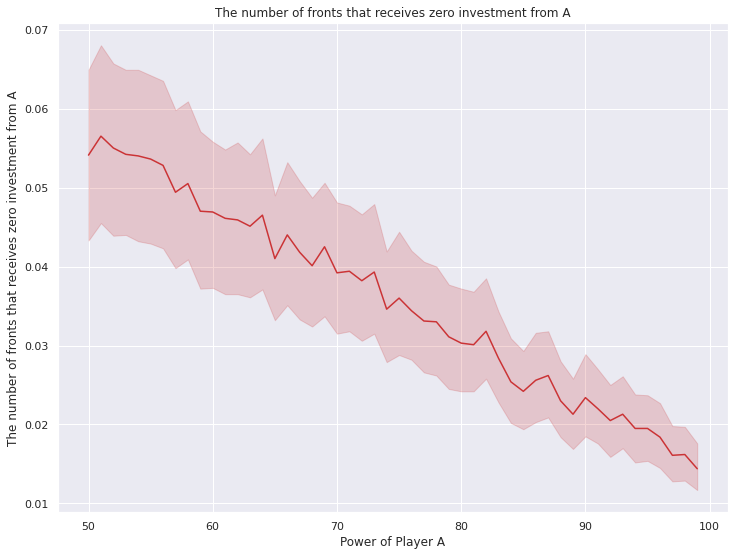

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

sns.set(rc={'figure.figsize':(12,9)})
sns.set_palette("Set1", 8, .75)
A_nonzero = sns.lineplot(
    x='n_a',
    y='A_0',
    data= df)
A_nonzero.set(xlabel="Power of Player A", ylabel = "The number of fronts that receives zero investment from A")
A_nonzero.set_title("The number of fronts that receives zero investment from A")
plt.show()

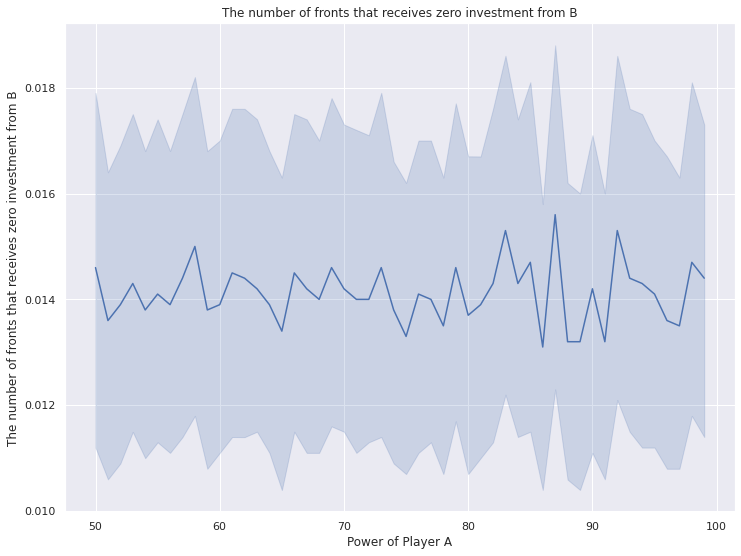

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
B_nonzero = sns.lineplot(
    x='n_a',
    y='B_0',
    data= df)
B_nonzero.set(xlabel="Power of Player A", ylabel = "The number of fronts that receives zero investment from B")
B_nonzero.set_title("The number of fronts that receives zero investment from B")
plt.show()

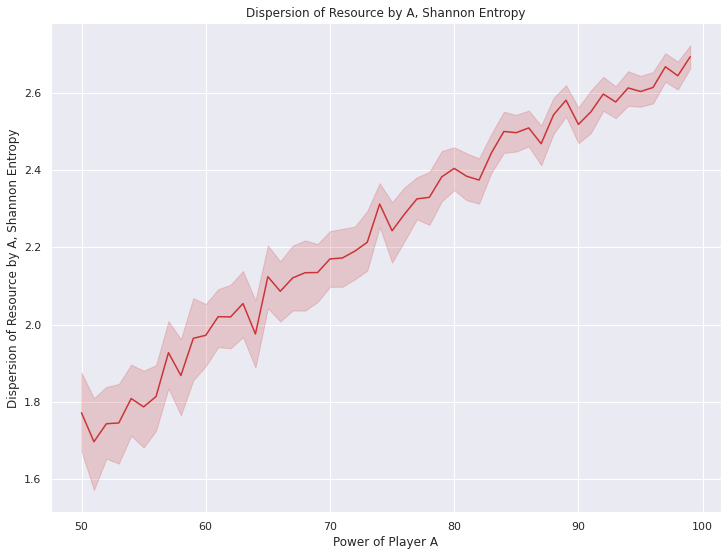

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_palette("Set1", 8, .75)
B_nonzero = sns.lineplot(
    x='n_a',
    y='Shannon_A',
    data= df)
B_nonzero.set(xlabel="Power of Player A", ylabel = "Dispersion of Resource by A, Shannon Entropy")
B_nonzero.set_title("Dispersion of Resource by A, Shannon Entropy")
plt.show()

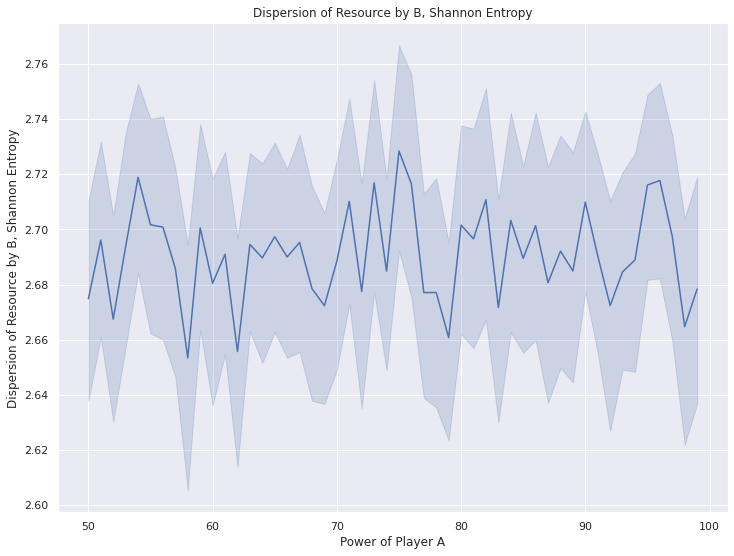

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
A_nonzero = sns.lineplot(
    x='n_a',
    y='Shannon_B',
    data= df)
A_nonzero.set(xlabel="Power of Player A", ylabel = "Dispersion of Resource by B, Shannon Entropy")
A_nonzero.set_title("Dispersion of Resource by B, Shannon Entropy")
plt.show()

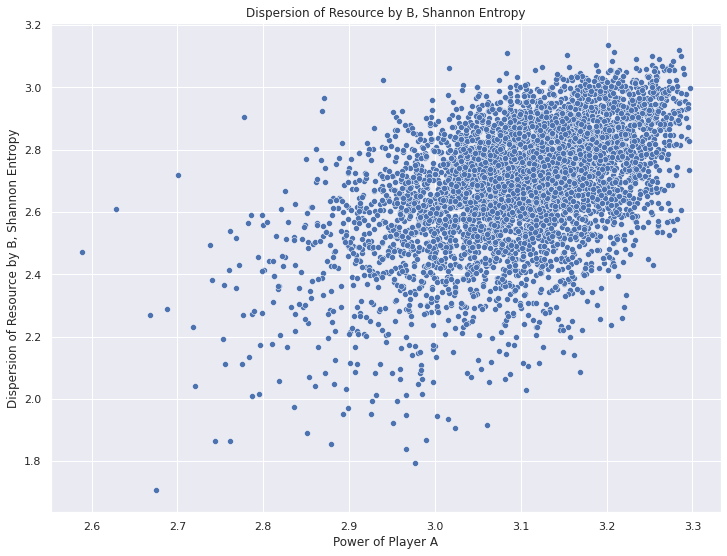

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
A_nonzero = sns.scatterplot(
    x='Shannon_value_B',
    y='Shannon_B',
    data= df)
A_nonzero.set(xlabel="Power of Player A", ylabel = "Dispersion of Resource by B, Shannon Entropy")
A_nonzero.set_title("Dispersion of Resource by B, Shannon Entropy")
plt.show()

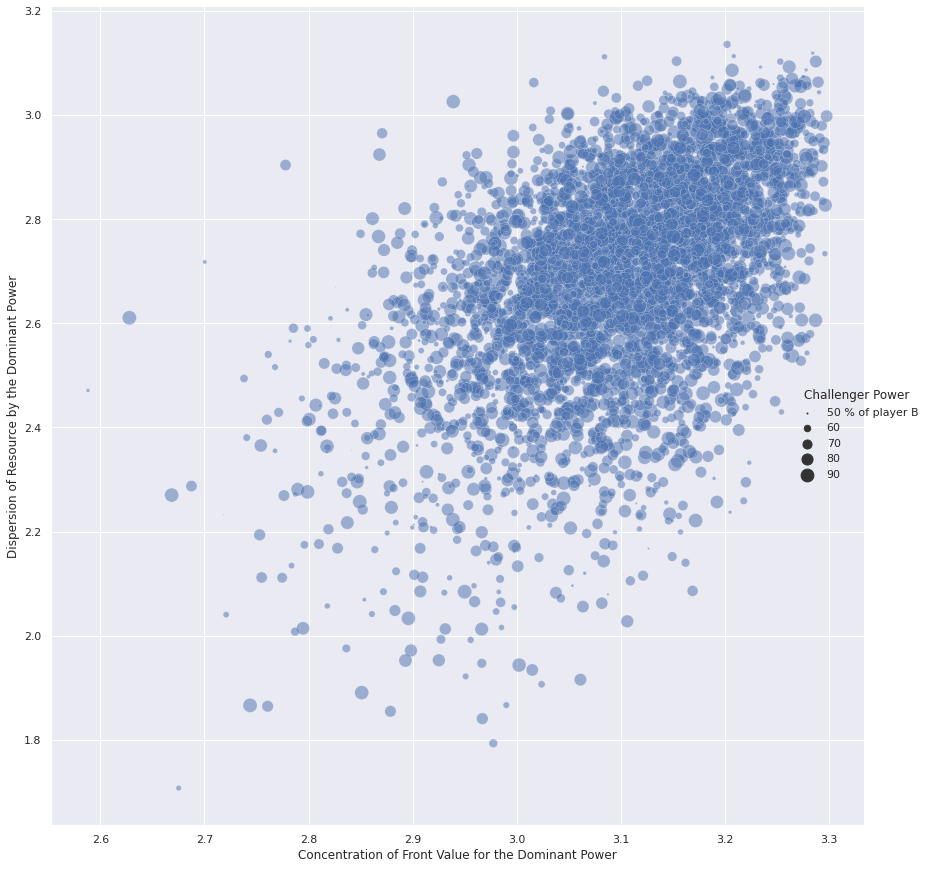

In [ ]:
entropy_entropy_plot = sns.relplot(x="Shannon_value_B", y="Shannon_B",size='n_a',
                                   sizes=(1, 200), alpha=.5, palette="muted",
                                   height=12, data=df)

# title
new_title = 'Challenger Power'
entropy_entropy_plot._legend.set_title(new_title)
# replace labels
new_labels = ['50 % of player B']
for t, l in zip(entropy_entropy_plot._legend.texts, new_labels): t.set_text(l)
entropy_entropy_plot.set_axis_labels(x_var = 'Dispersion of Front Value for the Dominant Power')
entropy_entropy_plot.set_axis_labels(y_var = 'Dispersion of Resource by the Dominant Power')